# Pymaceuticals Inc.
---

### Analysis

From this chart, you can see that the correlation between the tumor volume of a mouse, and its size is diretly connected. other factors are the timing and the gender. What is most interesting about this data is that you can track th e different data from the different drugs that were used in the experiment.
 

Starting Off
--------------

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, how = "right",on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [99]:
# Checking the number of mice.
mouse_count= mouse_data["Mouse ID"].nunique()
mouse_count

249

In [100]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data.loc[mouse_data.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_rows)

['g989']


In [251]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data =mouse_data[mouse_data["Mouse ID"] != 'g989']
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [103]:
# Checking the number of mice in the clean DataFrame.
mouse_count= mouse_data["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_mean = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tv_median = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tv_variance = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tv_st_dev = mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tv_sem =  mouse_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume":tv_mean, "Median Tumor Volume":tv_median, 'Tumor Volume Variance':tv_variance, "Tumor Volume Std. Dev.":tv_st_dev, 'Tumor Volume Std. Err.':tv_sem })
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [249]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_functions = {"Tumor Volume (mm3)":['mean','median','var','std','sem']}
# Using the aggregation method, produce the same summary statistics in a single line
functions_df = mouse_data.groupby(['Drug Regimen']).agg(agg_functions)
functions_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

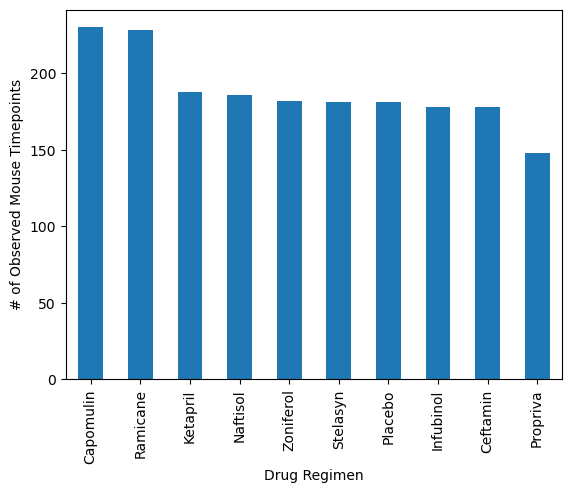

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data["Drug Regimen"].value_counts().plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints")
plt.show()

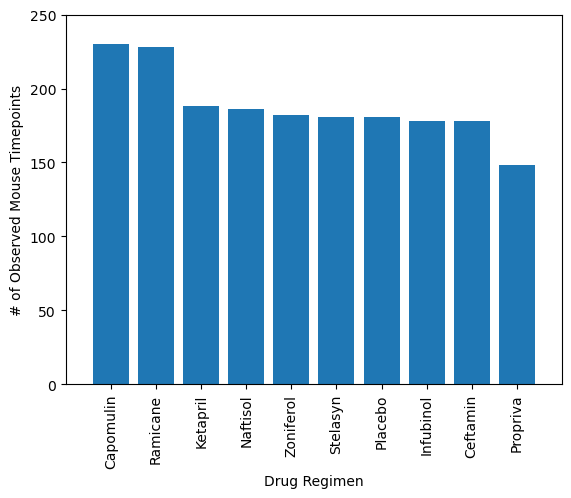

In [136]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_counts = mouse_data["Drug Regimen"].value_counts()
plt.bar(mouse_counts.index.values, mouse_counts.values)
plt.xlim(-1,10)
plt.ylim(0,220)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.yticks([0, 50, 100, 150, 200, 250])
plt.show()

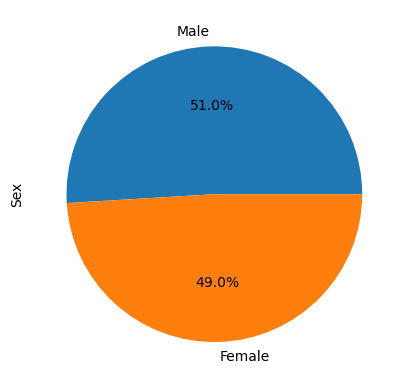

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data["Sex"].value_counts().plot(kind = "pie", autopct='%1.1f%%', ylabel = 'Sex')
plt.show()

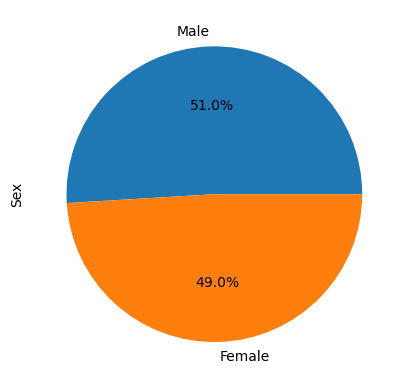

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "orange"]
plt.pie(mouse_data["Sex"].value_counts(), labels=labels,
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_mice = mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
# Start by getting the last (greatest) timepoint for each mouse
max_mice = max_mice.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_mice.merge(mouse_data, on = ['Mouse ID','Timepoint'], how = 'left')
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [246]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append(final_tumor)
    quartiles = final_tumor.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile_range = upper_quartile -lower_quartile
    # Determine outliers using upper and lower bounds
    upper_bound = upper_quartile + 1.5*inter_quartile_range
    lower_bound = lower_quartile - 1.5*inter_quartile_range
    outliers = final_tumor.loc[(final_tumor < lower_bound )|(final_tumor > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


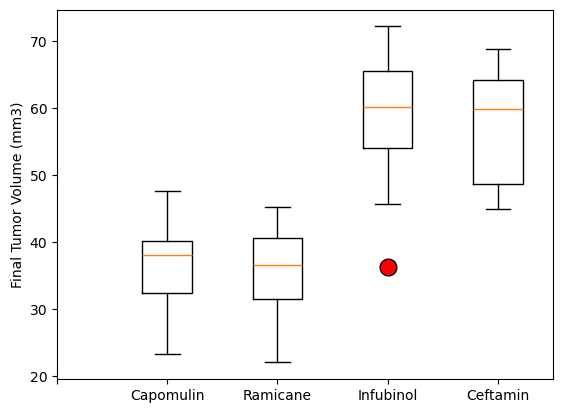

In [243]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments1 = ['','Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, chart1 = plt.subplots()
chart1.set_ylabel('Final Tumor Volume (mm3)')
chart1.boxplot(tumor_vol_data, flierprops=dict(marker='o', markerfacecolor='r', markersize=12) )
chart1.set_xticks(range(len(treatments1)))
chart1.set_xticklabels(treatments1)
plt.show()

## Line and Scatter Plots

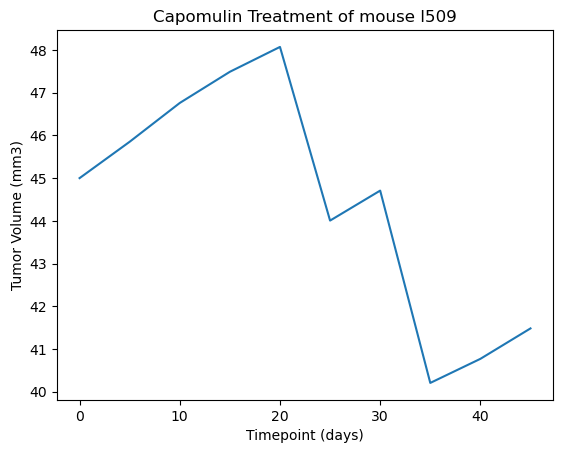

In [154]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_row = mouse_data.loc['l509']
plt.plot(mouse_row['Timepoint'], mouse_row['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

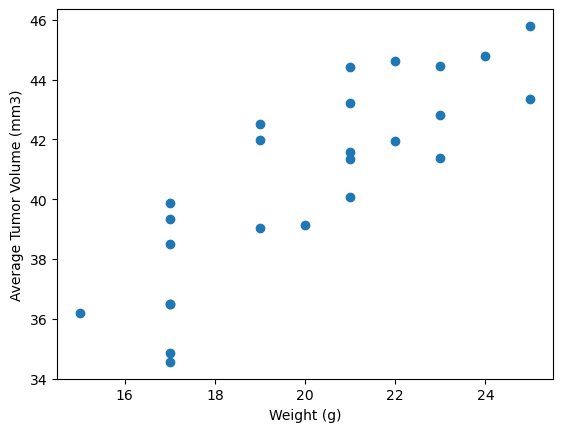

In [213]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_chart =mouse_data.loc[mouse_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_chart.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


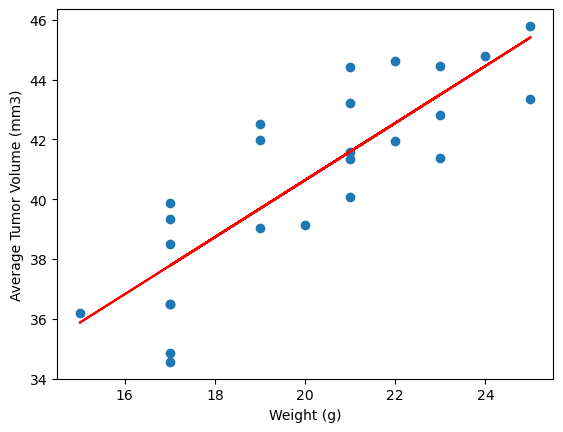

In [212]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_chart =mouse_data.loc[mouse_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_chart.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_value = x_values.corr(y_values)
line_eq = (round(slope,2)) 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
print(f"The correlation between mouse weight and the average tumor volume is {r_value}")
plt.show()